# Project Code: PRCP-1003
  
*   **Project** **Name**: Customer Transaction Prediction
*   **Domain**: Banking / Finance
*   **Objective** :

1.   Prepare a data analysis report for the given banking transaction dataset.
2. Build predictive models to identify customers likely to make a transaction in the future.  
3. Compare multiple models and select the best model for production.













In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Dataset Description

The dataset contains 200 anonymized features (var_0 to var_199), an ID_code column, and a target column.

target = 1 → Customer will make a transaction

target = 0 → Customer will not make a transaction

Total rows: 200,000 (train set)

Features are numerical and anonymized, so feature names do not have semantic meaning.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cust_transcation/train.csv')

In [ ]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df.shape

(200000, 202)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
df['target'].value_counts()


,count
target,
0,179902
1,20098


In [ ]:
df.isnull().sum()

,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


In [ ]:
y = df['target']

In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df.drop(columns=['ID_code','target'],inplace=True)

In [ ]:
X= df

In [ ]:
X.dtypes.unique()


array([dtype('float64')], dtype=object)

# Task 1: Data Loading & Overview

*  Dataset loaded successfully from Google Drive.

*  Shape: 200,000 rows × 142 columns (ID_code, target, var_0…var_199).

*  No duplicate rows found.

*  No missing values in any column.

*  Target variable (target) identified; class distribution:
    1.  0 → 179,902
    2.  1 → 20,098





*  ID_code column removed as it is not a feature.

*  All remaining features are numeric (float64).

*  Data is ready for preprocessing and modeling.


# Task 2:--- If customer will make transactions in future.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Outlier Check

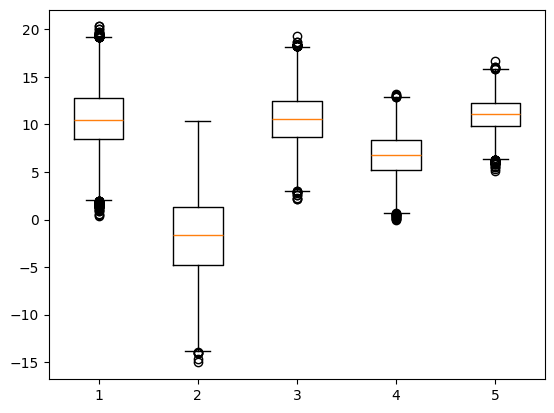

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(X.iloc[:,0:5])  # Check first 5 features
plt.show()

## Feature Scaling

StandardScaler was applied to scale the features to have mean = 0 and standard deviation = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building -- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,classification_report,precision_score,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[35420,   483],
       [ 2993,  1104]])

In [ ]:
recall = recall_score(y_test,y_pred)
recall

0.26946546253356113

In [ ]:
precision = precision_score(y_test,y_pred)
precision

0.6956521739130435

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9131

In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



## Logistic Regression Performance

The model achieved an accuracy of 91%, indicating good overall performance.

For the minority class (customers likely to transact):

* Precision: 0.70 → when the model predicts a transaction, it is correct 70% of the time.

* Recall: 0.27 → only 27% of actual transactions were correctly identified.

* F1-score: 0.39 → balance between precision and recall is low.

#2. Model - Desicion Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Decision Tree Training Subset

To speed up training, a 30% subset of the training data was selected using train_test_split.

Stratified sampling was used to maintain the original class distribution (stratify=y_train).

This subset (X_sub, y_sub) is used to train the Decision Tree without compromising class balance.

In [ ]:
from sklearn.model_selection import train_test_split

X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train, train_size=0.3, stratify=y_train, random_state=42
)


## Training with Best Parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=100,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
# Predictions
y_pred = dt.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.7037
F1 Score: 0.25505971087366436


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     35980
           1       0.17      0.50      0.26      4020

    accuracy                           0.70     40000
   macro avg       0.55      0.62      0.54     40000
weighted avg       0.85      0.70      0.76     40000



## Hyperparameter Tunning for DT

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 10)),
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": list(range(1, 10))
}


tree_clf = DecisionTreeClassifier(random_state=3)


tree_cv = RandomizedSearchCV(
    estimator=tree_clf,
    param_distributions=params,
    n_iter=50,
    scoring="f1",
    n_jobs=-1,
    verbose=2,
    cv=5,
    random_state=42
)




In [ ]:
# Fit RandomizedSearchCV
tree_cv.fit(X_train, y_train, sample_weight=sample_weights)

# Get best parameters
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf= 4,min_samples_split=6,splitter='best')

In [ ]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=6)

In [ ]:
# Predictions
y_pred_tuned = dt1.predict(X_test)

# Accuracy
acc_Tuned_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_Tuned_DT)

# F1 Score
f1_Tuned_DT = f1_score(y_test, y_pred)
print("F1 Score:", f1_Tuned_DT)


Accuracy: 0.7037
F1 Score: 0.25505971087366436


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     35980
           1       0.17      0.50      0.26      4020

    accuracy                           0.70     40000
   macro avg       0.55      0.62      0.54     40000
weighted avg       0.85      0.70      0.76     40000



Hyperparameter tuning did not lead to meaningful performance improvement for the Decision Tree on this dataset. This suggests that a single Decision Tree has limited capability to handle the class imbalance and complex patterns, and ensemble models (like XGBoost) are better suited.

## 3.Model- XGB


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier()
xgb_r.fit(X_train,y_train,sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_hat=xgb_r.predict(X_test)

In [ ]:
print(accuracy_score(y_hat,y_test))

0.894925


In [ ]:
print(f1_score(y_test,y_hat))

0.48423119401153514


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     35980
           1       0.48      0.49      0.48      4020

    accuracy                           0.89     40000
   macro avg       0.71      0.72      0.71     40000
weighted avg       0.90      0.89      0.90     40000



# Hyperparameter tunning on XBoost

In [ ]:
X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train,
    train_size=50000,
    stratify=y_train,
    random_state=42
)

In [ ]:
scale_pos_weight=sum(y_train==0)/sum(y_train==1)

In [ ]:
xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1)
)


In [ ]:

from sklearn.model_selection import GridSearchCV


from xgboost import XGBClassifier


XGB_2 = XGBClassifier(
    random_state=42,
    verbosity=0,
    n_jobs=-1,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    tree_method='hist'
)


param_grid = {
    'gamma': [0, 0.1, 0.2, 0.4],
    'learning_rate': [0.01, 0.03, 0.06, 0.1],
    'max_depth': [5, 6, 7, 8, 9],
    'n_estimators': [50, 65, 80],
    'reg_alpha': [0, 0.1, 0.2, 0.4],
    'reg_lambda': [0, 0.1, 0.2]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(
    estimator=XGB_2,
    param_distributions=param_grid,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [ ]:
rcv.fit(X_train_small, y_train_small)

In [ ]:
print("Best parameters:", rcv.best_params_)
print("Best F1 score:", rcv.best_score_)

In [ ]:
from xgboost import XGBClassifier

final_xgb = XGBClassifier(
    random_state=42,
    verbosity=0,
    n_jobs=-1,
    tree_method='hist',
    scale_pos_weight=sum(y_train==0) / sum(y_train==1),


    reg_lambda=0,
    reg_alpha=0.1,
    n_estimators=80,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.4
)




In [ ]:

final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = final_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     35980
           1       0.31      0.67      0.42      4020

    accuracy                           0.82     40000
   macro avg       0.63      0.75      0.66     40000
weighted avg       0.89      0.82      0.84     40000



In [ ]:
acc_tuned_xgb= accuracy_score(y_hat,y_test)
print(acc_tuned_xgb)

0.894925


In [ ]:
f1_tuned_xgb= f1_score(y_hat,y_test)
print(f1_tuned_xgb)

0.48423119401153514


[[29970  6010]
 [ 1329  2691]]


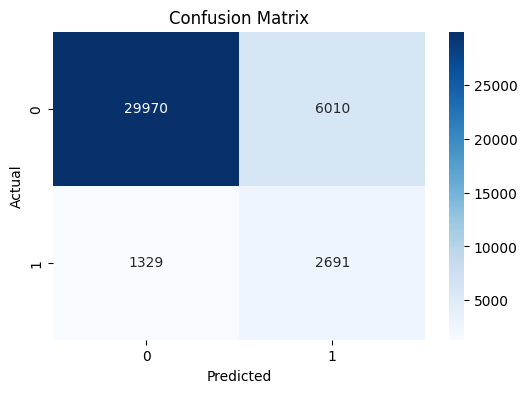

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

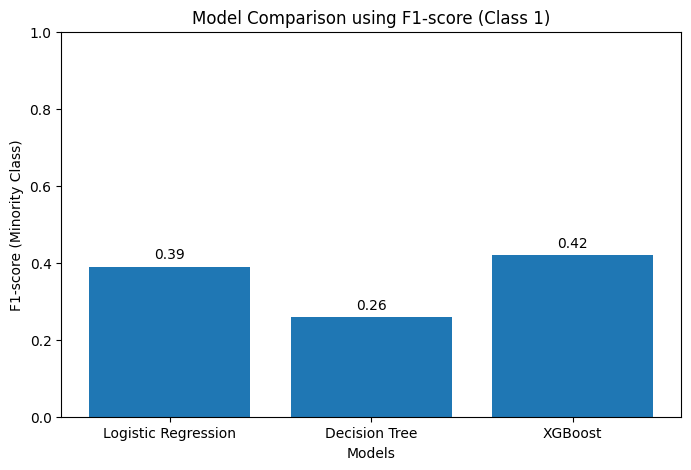

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'XGBoost']

# F1-scores for minority class (class = 1)
f1_scores = [0.39, 0.26, 0.42]

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1-score (Minority Class)')
plt.title('Model Comparison using F1-score (Class 1)')
plt.ylim(0, 1)

for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.02, round(score, 2), ha='center')

plt.show()


# Task 3 – Model Comparison

Three classification models were evaluated on the Customer Transaction dataset:

1. Logistic Regression

2. Decision Tree

3. XGBoost

Among the tested models, XGBoost achieved the best performance, followed by Logistic Regression, while Decision Tree showed the lowest performance.

XGBoost performed better because it effectively handles large, high-dimensional and imbalanced data by learning complex patterns through ensemble boosting and applying regularization to reduce overfitting.

# Challenges Faced and Solutions

## 1. Imbalanced Dataset
The dataset contained a strong class imbalance, with far fewer customers making transactions (minority class). This was handled by using evaluation metrics like F1-score and recall instead of accuracy alone

## 2. High-Dimensional Data
The dataset had 142 numerical features with 200k rows, which increased model complexity. Feature scaling using StandardScaler was applied for Logistic Regression to ensure stable and faster convergence.

## 3. Model Selection and Performance
Multiple models (Logistic Regression, Decision Tree, and XGBoost) were trained and evaluated. Model comparison using classification reports and F1-score helped identify the most suitable model for the imbalanced data

# Conclusion
In this project, customer transaction prediction was performed on an imbalanced dataset. Exploratory data analysis was conducted to understand the data distribution and feature characteristics. Multiple classification models like Logistic Regression, Decision Tree, and XGBoost were implemented and compared.

XGBoost provided the best performance, particularly in identifying the minority class, and demonstrated strong overall robustness. Therefore, XGBoost is recommended for production deployment due to its ability to handle imbalanced and high-dimensional data.